In [2]:
import pandas as pd

In [3]:
df= pd.read_csv('Airbnb_Open_Data.csv')

/var/folders/rl/bt44s3lj5gd5q_txp80zrvb00000gn/T/ipykernel_1025/476342204.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('Airbnb_Open_Data.csv')


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [5]:
print(df.tail())

             id                              NAME      host id  \
102594  6092437        Spare room in Williamsburg  12312296767   
102595  6092990     Best Location near Columbia U  77864383453   
102596  6093542    Comfy, bright room in Brooklyn  69050334417   
102597  6094094  Big Studio-One Stop from Midtown  11160591270   
102598  6094647              585 sf Luxury Studio  68170633372   

       host_identity_verified    host name neighbourhood group  \
102594               verified         Krik            Brooklyn   
102595            unconfirmed        Mifan           Manhattan   
102596            unconfirmed        Megan            Brooklyn   
102597            unconfirmed  Christopher              Queens   
102598            unconfirmed      Rebecca           Manhattan   

              neighbourhood       lat      long        country  ...  \
102594         Williamsburg  40.70862 -73.94651  United States  ...   
102595  Morningside Heights  40.80460 -73.96545  United States  

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
df_clean = df.copy()

print("BEFORE CLEANING:")
print("Shape:", df_clean.shape)
print("Missing values:\n", df_clean.isnull().sum().sort_values(ascending=False).head(10))
print("\nDuplicated rows:", df_clean.duplicated().sum())

# 1. Drop duplicated records
df_clean = df_clean.drop_duplicates()
print(f"\nAfter dropping duplicates: {df_clean.shape}")

# 2. Drop house_rules and license columns (insufficient data)
df_clean = df_clean.drop(['house_rules', 'license'], axis=1)

# 3. Clean price and service fee columns
def clean_currency_column(column):
    """Remove dollar signs and commas from currency columns"""
    if column.dtype == 'object':
        # Remove $ and , then convert to float
        column = column.str.replace('$', '', regex=False)
        column = column.str.replace(',', '', regex=False)
        # Convert to numeric, errors='coerce' will turn non-convertible values to NaN
        column = pd.to_numeric(column, errors='coerce')
    return column

# Clean price and service fee columns
df_clean['price'] = clean_currency_column(df_clean['price'])
df_clean['service fee'] = clean_currency_column(df_clean['service fee'])

# 4. Rename columns to include dollar sign
df_clean = df_clean.rename(columns={
    'price': 'price($)',
    'service fee': 'service fee($)'
})

# 5. Drop records with missing values
print(f"\nMissing values before dropping: {df_clean.isnull().sum().sum()}")
df_clean = df_clean.dropna()
print(f"After dropping missing values: {df_clean.shape}")

# 6. Correct data types
df_clean['id'] = df_clean['id'].astype(str)
df_clean['host id'] = df_clean['host id'].astype(str)
df_clean['last review'] = pd.to_datetime(df_clean['last review'])
df_clean['Construction year'] = pd.to_numeric(df_clean['Construction year'], errors='coerce')

# 7. Correct spelling of Brooklyn
df_clean['neighbourhood group'] = df_clean['neighbourhood group'].str.replace('brookin', 'Brooklyn', case=False)

# 8. Handle outliers in availability 365
Q1 = df_clean['availability 365'].quantile(0.25)
Q3 = df_clean['availability 365'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nAvailability 365 - Lower bound: {lower_bound}, Upper bound: {upper_bound}")
print(f"Records before outlier removal: {len(df_clean)}")

# Remove outliers
df_clean = df_clean[(df_clean['availability 365'] >= lower_bound) & 
                   (df_clean['availability 365'] <= upper_bound)]

print(f"Records after outlier removal: {len(df_clean)}")

print("\nAFTER CLEANING:")
print("Shape:", df_clean.shape)
print("Data types:\n", df_clean.dtypes)
print("\nMissing values:\n", df_clean.isnull().sum().sum())

BEFORE CLEANING:
Shape: (102599, 26)
Missing values:
 license                           102597
house_rules                        52131
last review                        15893
reviews per month                  15879
country                              532
availability 365                     448
minimum nights                       409
host name                            406
review rate number                   326
calculated host listings count       319
dtype: int64

Duplicated rows: 541

After dropping duplicates: (102058, 26)

Missing values before dropping: 35901
After dropping missing values: (83412, 24)

Availability 365 - Lower bound: -384.0, Upper bound: 656.0
Records before outlier removal: 83412
Records after outlier removal: 83411

AFTER CLEANING:
Shape: (83411, 24)
Data types:
 id                                        object
NAME                                      object
host id                                   object
host_identity_verified                    objec

BASIC STATISTICS:
                lat          long  Construction year      price($)  \
count  83411.000000  83411.000000       83411.000000  83411.000000   
mean      40.727353    -73.948500        2012.488509    626.212730   
min       40.504560    -74.249840        2003.000000     50.000000   
25%       40.687650    -73.982110        2007.000000    340.000000   
50%       40.721320    -73.953720        2012.000000    625.000000   
75%       40.762595    -73.930815        2017.000000    914.000000   
max       40.916970    -73.705220        2022.000000   1200.000000   
std        0.056324      0.050347           5.760870    331.787179   

       service fee($)  minimum nights  number of reviews  \
count    83411.000000    83411.000000       83411.000000   
mean       125.243709        7.405366          32.276642   
min         10.000000     -365.000000           1.000000   
25%         68.000000        2.000000           3.000000   
50%        125.000000        3.000000          11.0

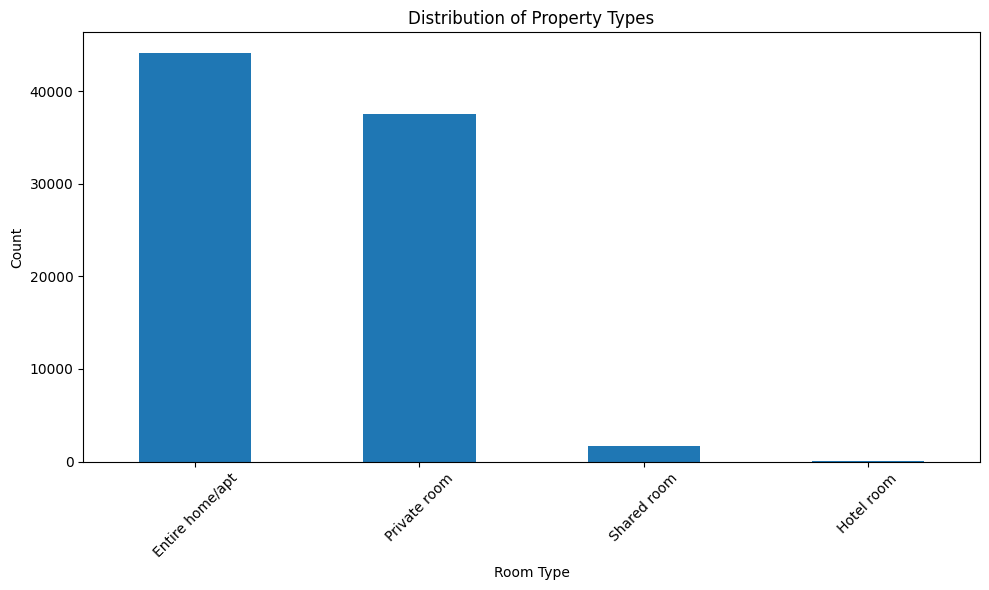


2. NEIGHBORHOOD GROUP LISTINGS:
neighbourhood group
Brooklyn         34635
Manhattan        34566
Queens           11126
Bronx             2267
Staten Island      816
brookln              1
Name: count, dtype: int64


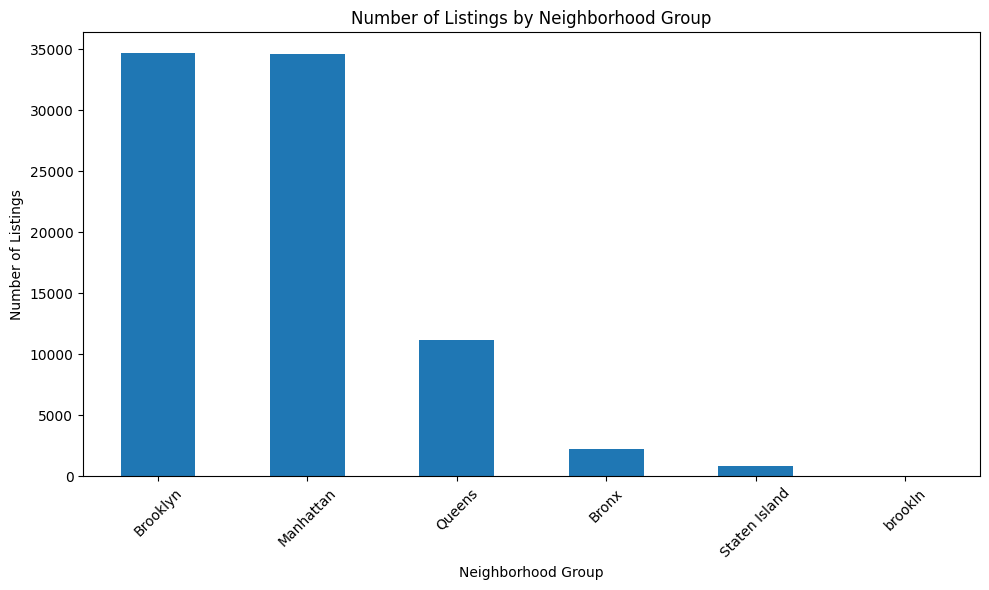


3. AVERAGE PRICES BY NEIGHBORHOOD GROUP:
neighbourhood group
Queens           630.457127
Bronx            630.201147
Brooklyn         627.438054
Manhattan        623.454869
Staten Island    622.132353
brookln          580.000000
Name: price($), dtype: float64


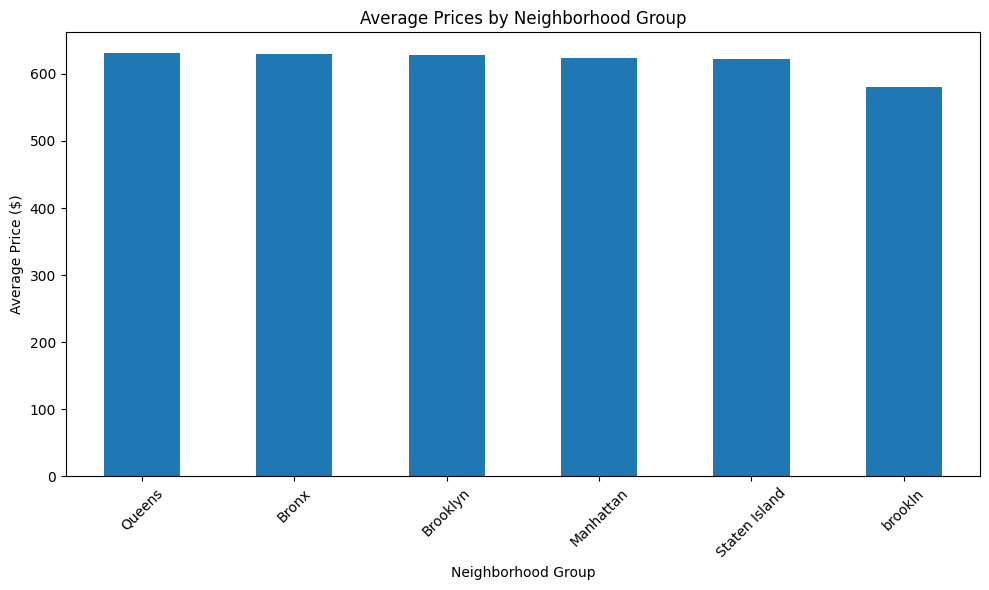


4. RELATIONSHIP BETWEEN CONSTRUCTION YEAR AND PRICE:


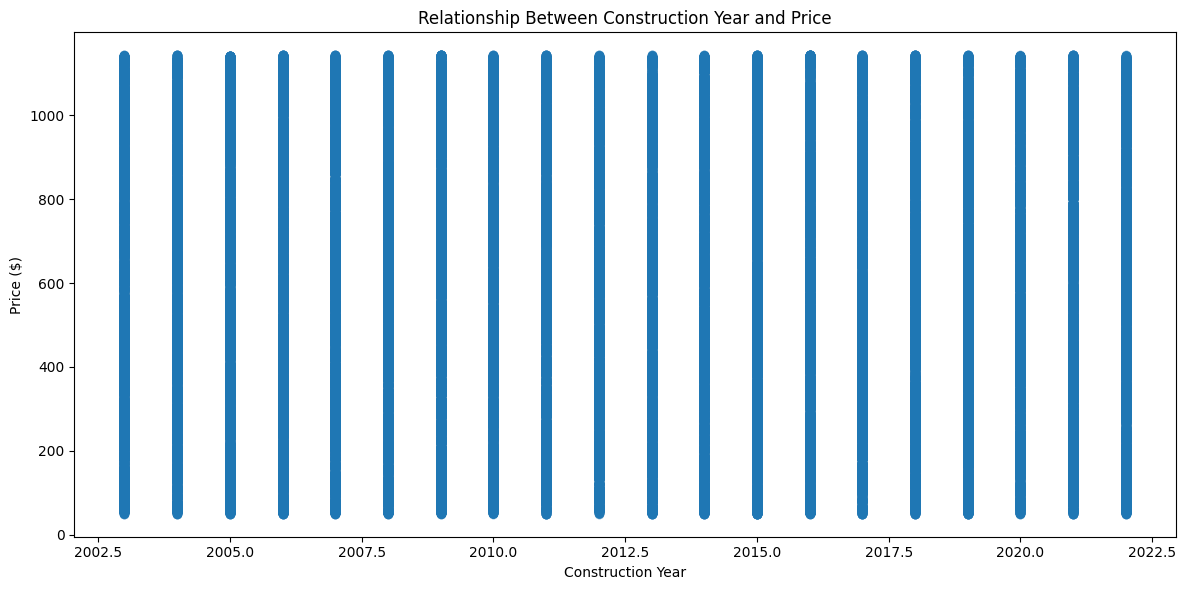

Correlation between Construction Year and Price: -0.004

5. TOP 10 HOSTS BY LISTING COUNT:
host name
Blueground      332.0
Sonder (NYC)    327.0
Eugene          218.0
Karen           208.0
Jeniffer        186.0
Soya            171.0
Kaz             161.0
Hiroki          152.0
Momoyo          126.0
Shogo           125.0
Name: calculated host listings count, dtype: float64


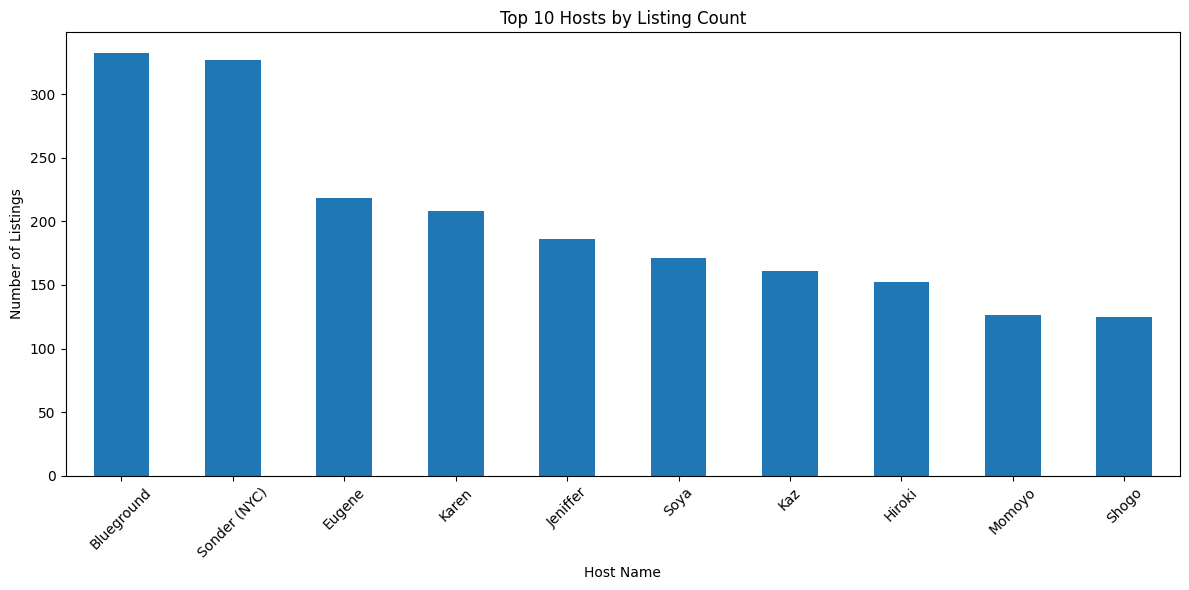


6. HOST IDENTITY VERIFICATION vs REVIEW RATINGS:
host_identity_verified
unconfirmed    3.273370
verified       3.284186
Name: review rate number, dtype: float64


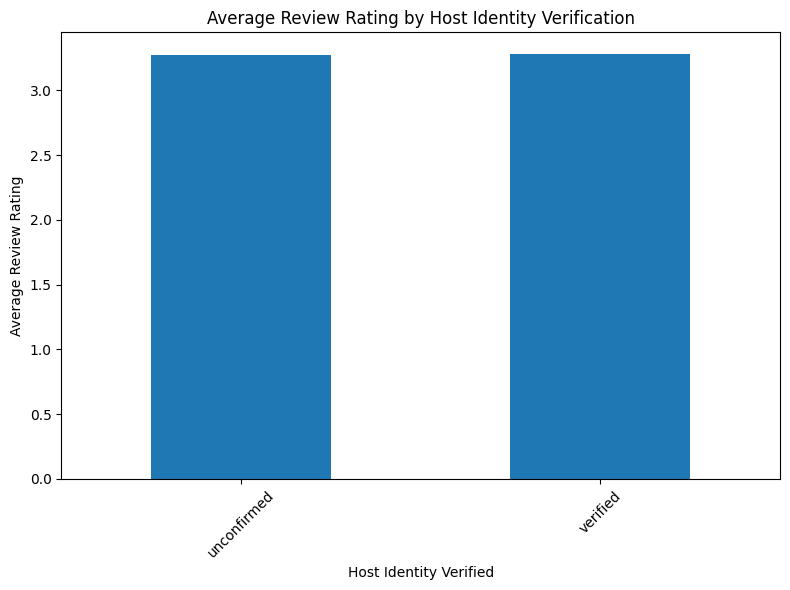


7. CORRELATION BETWEEN PRICE AND SERVICE FEE:


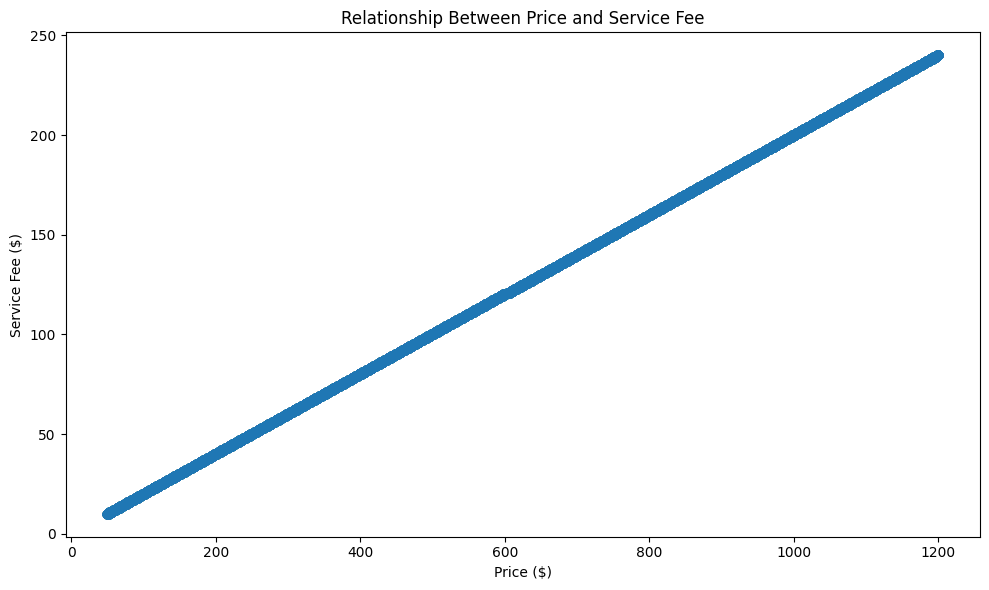

Correlation between Price and Service Fee: 1.000

8. AVERAGE REVIEW RATE BY NEIGHBORHOOD GROUP AND ROOM TYPE:
room type            Entire home/apt  Hotel room  Private room  Shared room
neighbourhood group                                                        
Bronx                       3.381881         NaN      3.305810     3.356322
Brooklyn                    3.242491    3.833333      3.274860     3.323383
Manhattan                   3.268846    3.500000      3.285605     3.261976
Queens                      3.350045    3.750000      3.310847     3.327402
Staten Island               3.333333         NaN      3.497449     3.714286
brookln                          NaN         NaN      4.000000          NaN


<Figure size 1200x800 with 0 Axes>

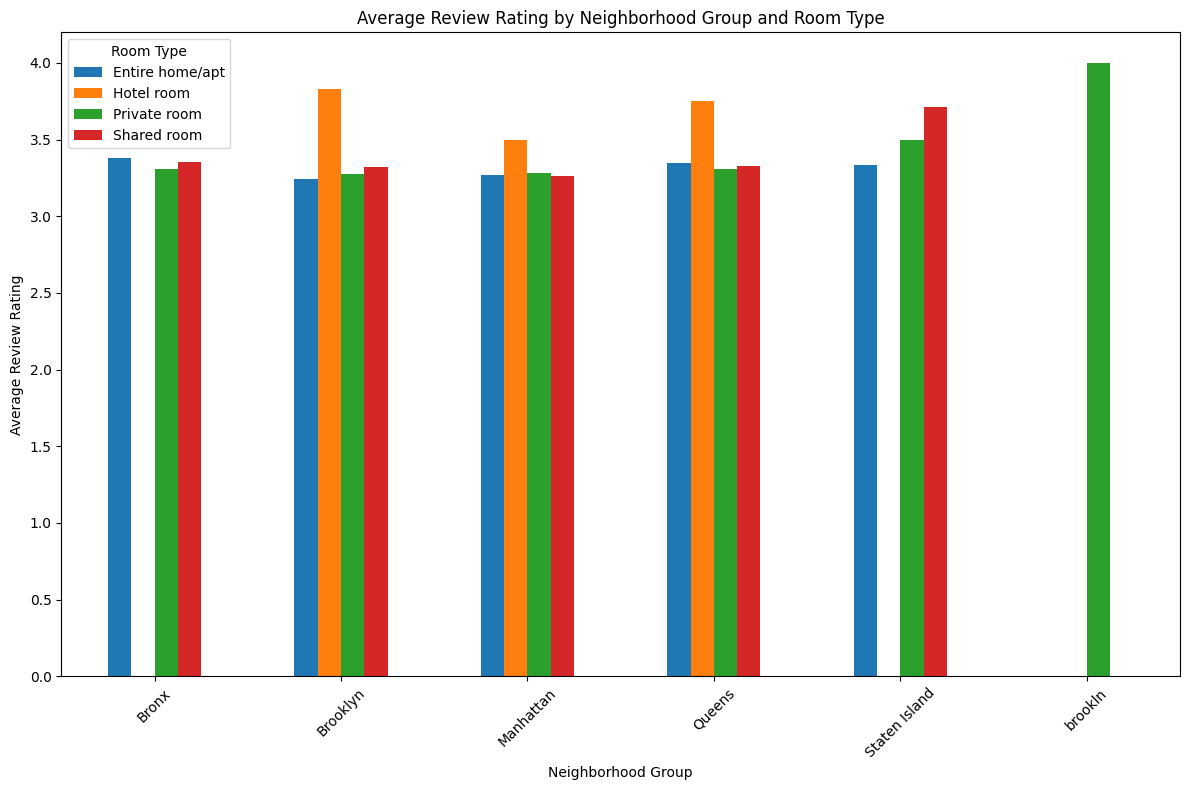


9. RELATIONSHIP BETWEEN HOST LISTINGS COUNT AND AVAILABILITY:


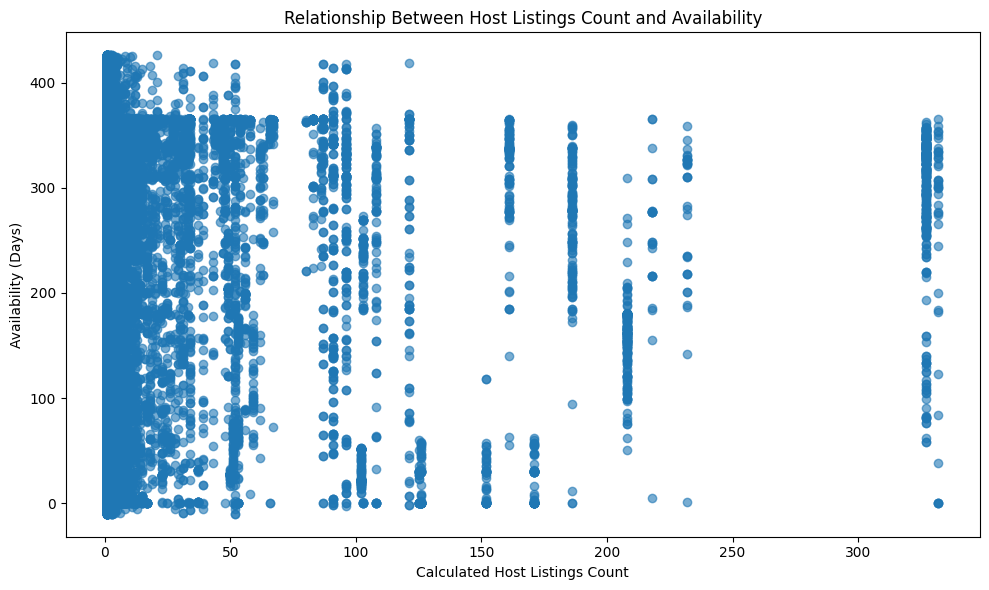

Correlation between Host Listings Count and Availability: 0.136


In [9]:
# Basic statistics
print("BASIC STATISTICS:")
print(df_clean.describe())

# Answering the specific questions from the problem statement

# 1. What are the different property types in the Dataset?
print("\n1. PROPERTY TYPES:")
property_types = df_clean['room type'].value_counts()
print(property_types)

plt.figure(figsize=(10, 6))
property_types.plot(kind='bar')
plt.title('Distribution of Property Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Which neighborhood group has the highest number of listings?
print("\n2. NEIGHBORHOOD GROUP LISTINGS:")
neighborhood_counts = df_clean['neighbourhood group'].value_counts()
print(neighborhood_counts)

plt.figure(figsize=(10, 6))
neighborhood_counts.plot(kind='bar')
plt.title('Number of Listings by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Which neighborhoods group have the highest average prices for Airbnb listings?
print("\n3. AVERAGE PRICES BY NEIGHBORHOOD GROUP:")
avg_prices = df_clean.groupby('neighbourhood group')['price($)'].mean().sort_values(ascending=False)
print(avg_prices)

plt.figure(figsize=(10, 6))
avg_prices.plot(kind='bar')
plt.title('Average Prices by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Is there a relationship between the construction year of property and price?
print("\n4. RELATIONSHIP BETWEEN CONSTRUCTION YEAR AND PRICE:")
# Remove extreme outliers for better visualization
price_q95 = df_clean['price($)'].quantile(0.95)
filtered_df = df_clean[df_clean['price($)'] <= price_q95]

plt.figure(figsize=(12, 6))
plt.scatter(filtered_df['Construction year'], filtered_df['price($)'], alpha=0.6)
plt.title('Relationship Between Construction Year and Price')
plt.xlabel('Construction Year')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

# Calculate correlation
correlation = df_clean[['Construction year', 'price($)']].corr().iloc[0,1]
print(f"Correlation between Construction Year and Price: {correlation:.3f}")

# 5. Who are the top 10 hosts by calculated host listing count?
print("\n5. TOP 10 HOSTS BY LISTING COUNT:")
top_hosts = df_clean.groupby('host name')['calculated host listings count'].max().sort_values(ascending=False).head(10)
print(top_hosts)

plt.figure(figsize=(12, 6))
top_hosts.plot(kind='bar')
plt.title('Top 10 Hosts by Listing Count')
plt.xlabel('Host Name')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Are hosts with verified identities more likely to receive positive reviews?
print("\n6. HOST IDENTITY VERIFICATION vs REVIEW RATINGS:")
verified_reviews = df_clean.groupby('host_identity_verified')['review rate number'].mean()
print(verified_reviews)

plt.figure(figsize=(8, 6))
verified_reviews.plot(kind='bar')
plt.title('Average Review Rating by Host Identity Verification')
plt.xlabel('Host Identity Verified')
plt.ylabel('Average Review Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Is there a correlation between the price of a listing and its service fee?
print("\n7. CORRELATION BETWEEN PRICE AND SERVICE FEE:")
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['price($)'], df_clean['service fee($)'], alpha=0.6)
plt.title('Relationship Between Price and Service Fee')
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.tight_layout()
plt.show()

correlation_price_service = df_clean[['price($)', 'service fee($)']].corr().iloc[0,1]
print(f"Correlation between Price and Service Fee: {correlation_price_service:.3f}")

# 8. What is the average review rate number, and does it vary based on neighborhood group and room type?
print("\n8. AVERAGE REVIEW RATE BY NEIGHBORHOOD GROUP AND ROOM TYPE:")
review_by_group_room = df_clean.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().unstack()
print(review_by_group_room)

plt.figure(figsize=(12, 8))
review_by_group_room.plot(kind='bar', figsize=(12, 8))
plt.title('Average Review Rating by Neighborhood Group and Room Type')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Review Rating')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()

# 9. Are hosts with higher calculated host listings count more likely to maintain higher availability?
print("\n9. RELATIONSHIP BETWEEN HOST LISTINGS COUNT AND AVAILABILITY:")
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['calculated host listings count'], df_clean['availability 365'], alpha=0.6)
plt.title('Relationship Between Host Listings Count and Availability')
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Availability (Days)')
plt.tight_layout()
plt.show()

correlation_availability = df_clean[['calculated host listings count', 'availability 365']].corr().iloc[0,1]
print(f"Correlation between Host Listings Count and Availability: {correlation_availability:.3f}")